# Analysis: Most Popular App in the Apple Store

This notebook outlines our project to analyze mobile app data from the Apple Store. Our key project steps include:

1️⃣. **Analyzing Mobile App Data**  
2️⃣. **Opening and Exploring the Data**  
3️⃣. **Deleting Wrong Data and Removing Duplicates**  
4️⃣. **Filtering to Use Only English Apps**  
5️⃣. **Isolating and Examining Free Apps**  
6️⃣. **Determining Most Common Apps by Genre**  
7️⃣. **Analyzing the Most Popular Apps by Genre**  

✔️ Let’s walk through each step with clear visualizations and data insights.


## 1️⃣ Importing Libraries

In [47]:
# Import necessary libraries for data analysis and visualization

# Pandas: Used for handling and analyzing structured data efficiently
import pandas as pd
# OS: Provides functions to interact with the operating system (file paths, directory handling, etc.)
import os
# Matplotlib: A fundamental plotting library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
# Seaborn: Built on top of Matplotlib, enhances visualization aesthetics and statistical plots
import seaborn as sns
# Langdetect: Detects language from text; useful for filtering non-English apps or data
from langdetect import detect
# Set Seaborn style for enhanced visualization aesthetics
sns.set(style="whitegrid")


## 2️⃣ Loading and Exploring the Data

**In this step, we load our dataset from a CSV file and perform an initial exploratory analysis.**
**We examine the head/tail of the DataFrame, data types of each column, and unique values in key categorical columns.**


In [35]:
# Define the file path to the AppleStore CSV data
file_path = r"C:\Users\oviem\OneDrive\Desktop\CSV_FiLES\AppleStore.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first five rows
print("First five rows:")
print(df.head())

# Display the last five rows
print("\nLast five rows:")
print(df.tail())

# Display the data types of the DataFrame columns
print("\nData Types:")
print(df.dtypes)

# List all column names
print("\nColumns:")
print(df.columns)

# Display unique values for 'prime_genre' and 'currency'
print("\nUnique Genres:")
print(df['prime_genre'].unique())
print("\nUnique Currencies:")
print(df['currency'].unique())


First five rows:
          id               track_name  size_bytes currency  price  \
0  284882215                 Facebook   389879808      USD    0.0   
1  389801252                Instagram   113954816      USD    0.0   
2  529479190           Clash of Clans   116476928      USD    0.0   
3  420009108               Temple Run    65921024      USD    0.0   
4  284035177  Pandora - Music & Radio   130242560      USD    0.0   

   rating_count_tot  rating_count_ver  user_rating  user_rating_ver      ver  \
0           2974676               212          3.5              3.5       95   
1           2161558              1289          4.5              4.0    10.23   
2           2130805               579          4.5              4.5  9.24.12   
3           1724546              3842          4.5              4.0    1.6.2   
4           1126879              3594          4.0              4.5    8.4.1   

  cont_rating        prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  \
0      

## 3️⃣ Visualizing the Distribution of User Ratings
## User Rating Distribution

**The following plot displays the distribution of user ratings across all apps.**
**This will help us understand how users rate different apps on the platform.**


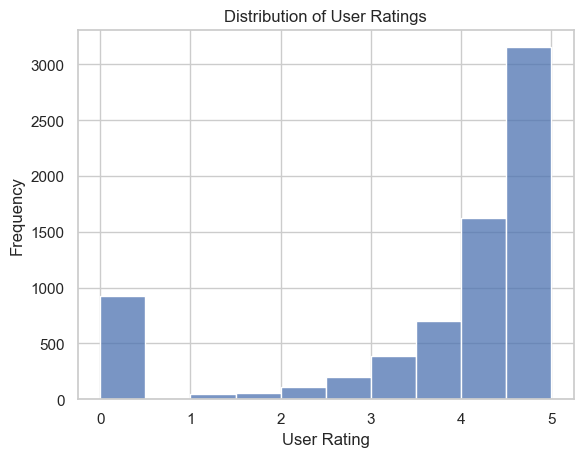


Top Rated Apps:
                                      track_name  user_rating prime_genre
23                                   Head Soccer          5.0       Games
28                            Plants vs. Zombies          5.0       Games
40    Sniper 3D Assassin: Shoot to Kill Gun Game          5.0       Games
44                            Geometry Dash Lite          5.0       Games
53                                Infinity Blade          5.0       Games
...                                          ...          ...         ...
6252                    蜀山诛魔纪-古装恋爱仙侠动作手游·MMO端游品质          5.0       Games
6253                             大挂西游 - 降魔之路官方正版          5.0       Games
6261       Versus - Multiplayer Game (2 players)          5.0       Games
6266            Advent Magnificat Companion 2016          5.0        Book
6267                      おかんからのメッセ - ほのぼの謎解きゲーム          5.0        Book

[492 rows x 3 columns]


In [37]:
# Plot histogram for the distribution of user ratings
sns.histplot(df['user_rating'], bins=10)
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings')
plt.show()

# Identify the apps with the highest user ratings
top_rated_apps = df[df['user_rating'] == df['user_rating'].max()]
print("\nTop Rated Apps:")
print(top_rated_apps[['track_name', 'user_rating', 'prime_genre']])

## 4️⃣ Removing Non-English Apps

**In order to ensure consistency in our analysis, we filter out non-English apps.**
**We use the `langdetect` library to check if an app's name is in English.**


In [39]:
# Function to detect if a string is in English
def is_english(name):
    try:
        return detect(name) == 'en'
    except:
        return False

# Filter out non-English apps by iterating through each row
english_apps = []
for index, row in df.iterrows():
    if is_english(row['track_name']):
        english_apps.append(row)

# Create a new DataFrame with only English apps
df_english = pd.DataFrame(english_apps)

# Display the first few rows of the cleaned English apps DataFrame
print("Filtered English Apps:")
print(df_english.head())
print(df_english.tail())
print(df_english.info())

Filtered English Apps:
           id        track_name  size_bytes currency  price  rating_count_tot  \
2   529479190    Clash of Clans   116476928      USD    0.0           2130805   
7   553834731  Candy Crush Saga   222846976      USD    0.0            961794   
8   324684580     Spotify Music   132510720      USD    0.0            878563   
10  512939461    Subway Surfers   156038144      USD    0.0            706110   
13  469369175        CSR Racing   524803072      USD    0.0            677247   

    rating_count_ver  user_rating  user_rating_ver      ver cont_rating  \
2                579          4.5              4.5  9.24.12          9+   
7               2453          4.5              4.5  1.101.0          4+   
8               8253          4.5              4.5    8.4.3         12+   
10                97          4.5              4.0   1.72.1          9+   
13              2029          4.5              4.5    4.0.1          4+   

   prime_genre  sup_devices.num  ipadSc

## 5️⃣ Analyzing Free Apps and Genre Distribution

Next, we analyze free apps:
- **Counting Free Apps by Genre:** We count the number of free apps per genre.
- **Size Distribution:** We examine the size of free apps.
- **User Ratings vs. Total Ratings:** We visualize how the number of ratings corresponds to user ratings.
- **Average Ratings by Genre:** We calculate the mean user rating for free apps per genre.

Free Apps by Genre:
prime_genre
Games                2257
Entertainment         334
Photo & Video         167
Social Networking     143
Education             132
Shopping              121
Utilities             109
Lifestyle              94
Finance                84
Sports                 79
Health & Fitness       76
Music                  67
Book                   66
Productivity           62
News                   58
Travel                 56
Food & Drink           43
Weather                31
Business               20
Navigation             20
Reference              20
Catalogs                9
Medical                 8
Name: count, dtype: int64


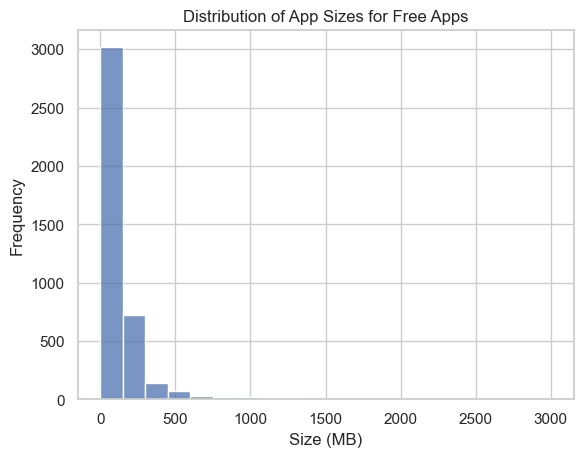

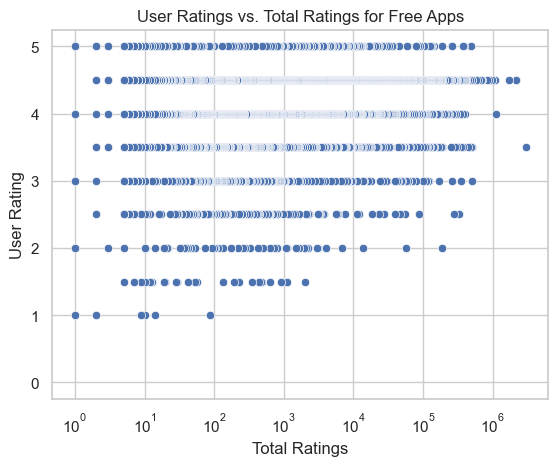

Average Ratings for Free Apps by Genre:
prime_genre
Productivity         3.959677
Music                3.940299
Photo & Video        3.793413
Health & Fitness     3.578947
Shopping             3.533058
Games                3.528578
Business             3.500000
Education            3.484848
Utilities            3.454128
Travel               3.375000
Reference            3.300000
Weather              3.258065
Entertainment        3.148204
Food & Drink         3.034884
Social Networking    2.996503
Sports               2.917722
News                 2.879310
Medical              2.875000
Lifestyle            2.590426
Finance              2.220238
Navigation           2.200000
Catalogs             1.833333
Book                 1.598485
Name: user_rating, dtype: float64


In [41]:
# Count free apps by genre
free_apps_genre_counts = df[df['price'] == 0]['prime_genre'].value_counts()
print("Free Apps by Genre:")
print(free_apps_genre_counts)

# Visualize the distribution of app sizes (in MB) for free apps
sns.histplot(df[df['price'] == 0]['size_bytes'] / (1024 * 1024), bins=20)
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes for Free Apps')
plt.show()

# Scatter plot: Total Ratings vs. User Rating for free apps (log scale on x-axis)
sns.scatterplot(data=df[df['price'] == 0], x='rating_count_tot', y='user_rating')
plt.xlabel('Total Ratings')
plt.ylabel('User Rating')
plt.title('User Ratings vs. Total Ratings for Free Apps')
plt.xscale('log')
plt.show()

# Calculate the average user rating for free apps by genre
free_apps_avg_ratings = df[df['price'] == 0].groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)
print("Average Ratings for Free Apps by Genre:")
print(free_apps_avg_ratings)


## 6️⃣ Comparing App Metrics Across Top Genres
#### Top Genres Analysis

We now focus on the top genres by app count and investigate:
- The average user rating for these genres.
- Distribution of app sizes by genre.
- Relationship between the total number of ratings and user ratings.
- The free vs. paid split (displayed through a pie chart) within each genre.
- Determine Top Genres and Their Metrics.

Average User Ratings by Top Genres:
prime_genre
Education        3.376380
Entertainment    3.246729
Games            3.685008
Photo & Video    3.800860
Utilities        3.278226
Name: user_rating, dtype: float64


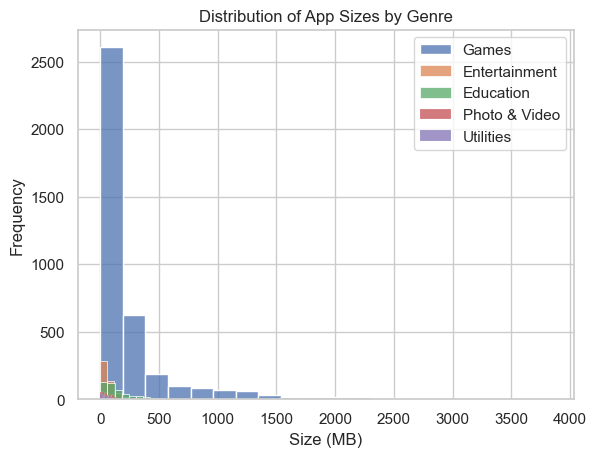

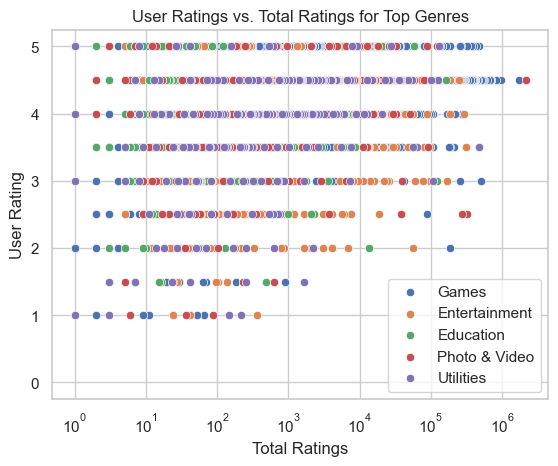

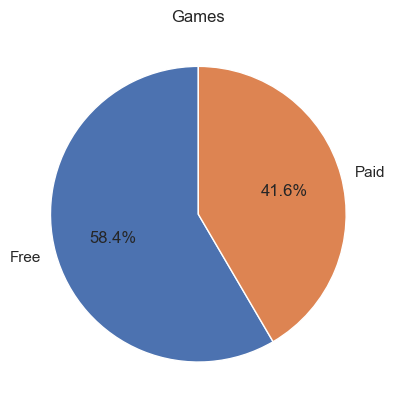

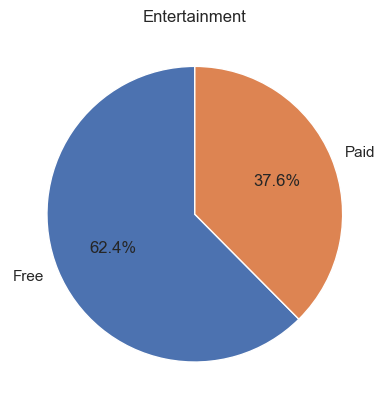

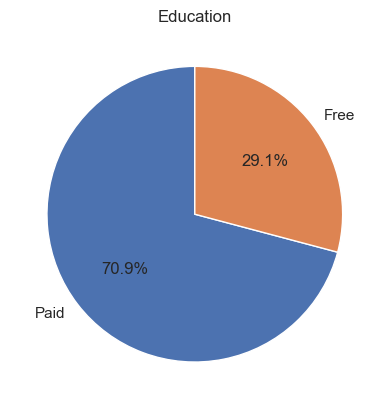

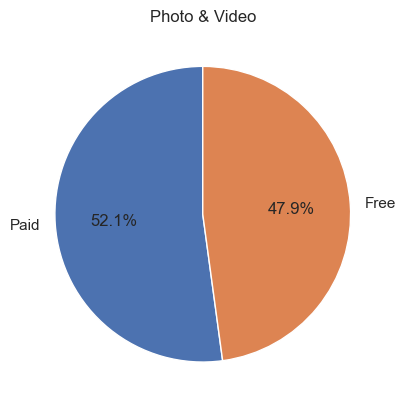

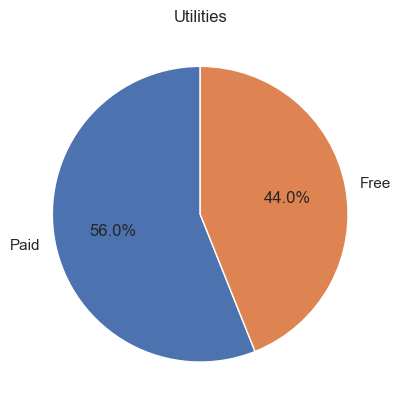

In [43]:
# Load Path to Visualize
try:
    def load_data():
        df = pd.read_csv(file_path)
        return df
    df = load_data()  # Calling the function to assign df
except Exception as e:
    print(F"Error: {e}")
    
# Identify the top 5 genres by the count of apps
top_genres = df['prime_genre'].value_counts().head(5).index

# Calculate the average user rating for apps in these top genres
average_ratings = df[df['prime_genre'].isin(top_genres)].groupby('prime_genre')['user_rating'].mean()
print("Average User Ratings by Top Genres:")
print(average_ratings)

# Plot distribution of app sizes for each top genre
for genre in top_genres:
    sns.histplot(df[df['prime_genre'] == genre]['size_bytes'] / (1024 * 1024), bins=20, label=genre)
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes by Genre')
plt.legend()
plt.show()

# Scatter plot: Total Ratings vs. User Rating for each top genre
for genre in top_genres:
    sns.scatterplot(data=df[df['prime_genre'] == genre], x='rating_count_tot', y='user_rating', label=genre)
plt.xlabel('Total Ratings')
plt.ylabel('User Rating')
plt.title('User Ratings vs. Total Ratings for Top Genres')
plt.xscale('log')
plt.legend()
plt.show()

# For each top genre, display a pie chart comparing the proportion of Free vs. Paid apps
for genre in top_genres:
    free_vs_paid = df[df['prime_genre'] == genre]['price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()
    free_vs_paid.plot(kind='pie', autopct='%1.1f%%', startangle=90, title=genre)
    plt.ylabel('')
    plt.show()


# Conclusion

In this analysis, we:
- Loaded and explored the dataset.
- Filtered out non-English apps to maintain consistency.
- Focused on free apps to study genre popularity and app size distribution.
- Visualized key metrics such as user ratings, app size distributions, and the free vs. paid breakdown by genre.

These insights can help stakeholders better understand the trends in the Apple Store and guide decisions on marketing, app development, and investment strategies.

Thank you for your attention!

- **Author: OVIE SANIYO.**